In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X=df.drop('class',axis=1)

In [4]:
X=pd.get_dummies(X,drop_first=True)

In [5]:
y=df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [10]:
param_grid={'n_estimators':[50,100],
           'learning_rate':[0.1,0.05,0.2],
           'max_depth':[3,4,5]}

In [11]:
gb_model=GradientBoostingClassifier()

In [12]:
grid=GridSearchCV(gb_model,param_grid)

In [13]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [14]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [15]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [16]:
prediction=grid.predict(X_test)

In [17]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [21]:
feat_import=grid.best_estimator_.feature_importances_

In [24]:
imp_feat=pd.DataFrame(data=feat_import, index=X.columns, columns=['Importance'])

In [33]:
imp=imp_feat[imp_feat['Importance']>0.0005].sort_values('Importance')

In [34]:
imp

,Importance
stalk-root_b,0.000714
ring-number_o,0.000864
ring-number_t,0.001023
cap-surface_g,0.001045
ring-type_p,0.001212
stalk-surface-above-ring_s,0.001496
stalk-color-above-ring_c,0.002092
cap-color_y,0.002388
population_c,0.002513
stalk-root_e,0.003028


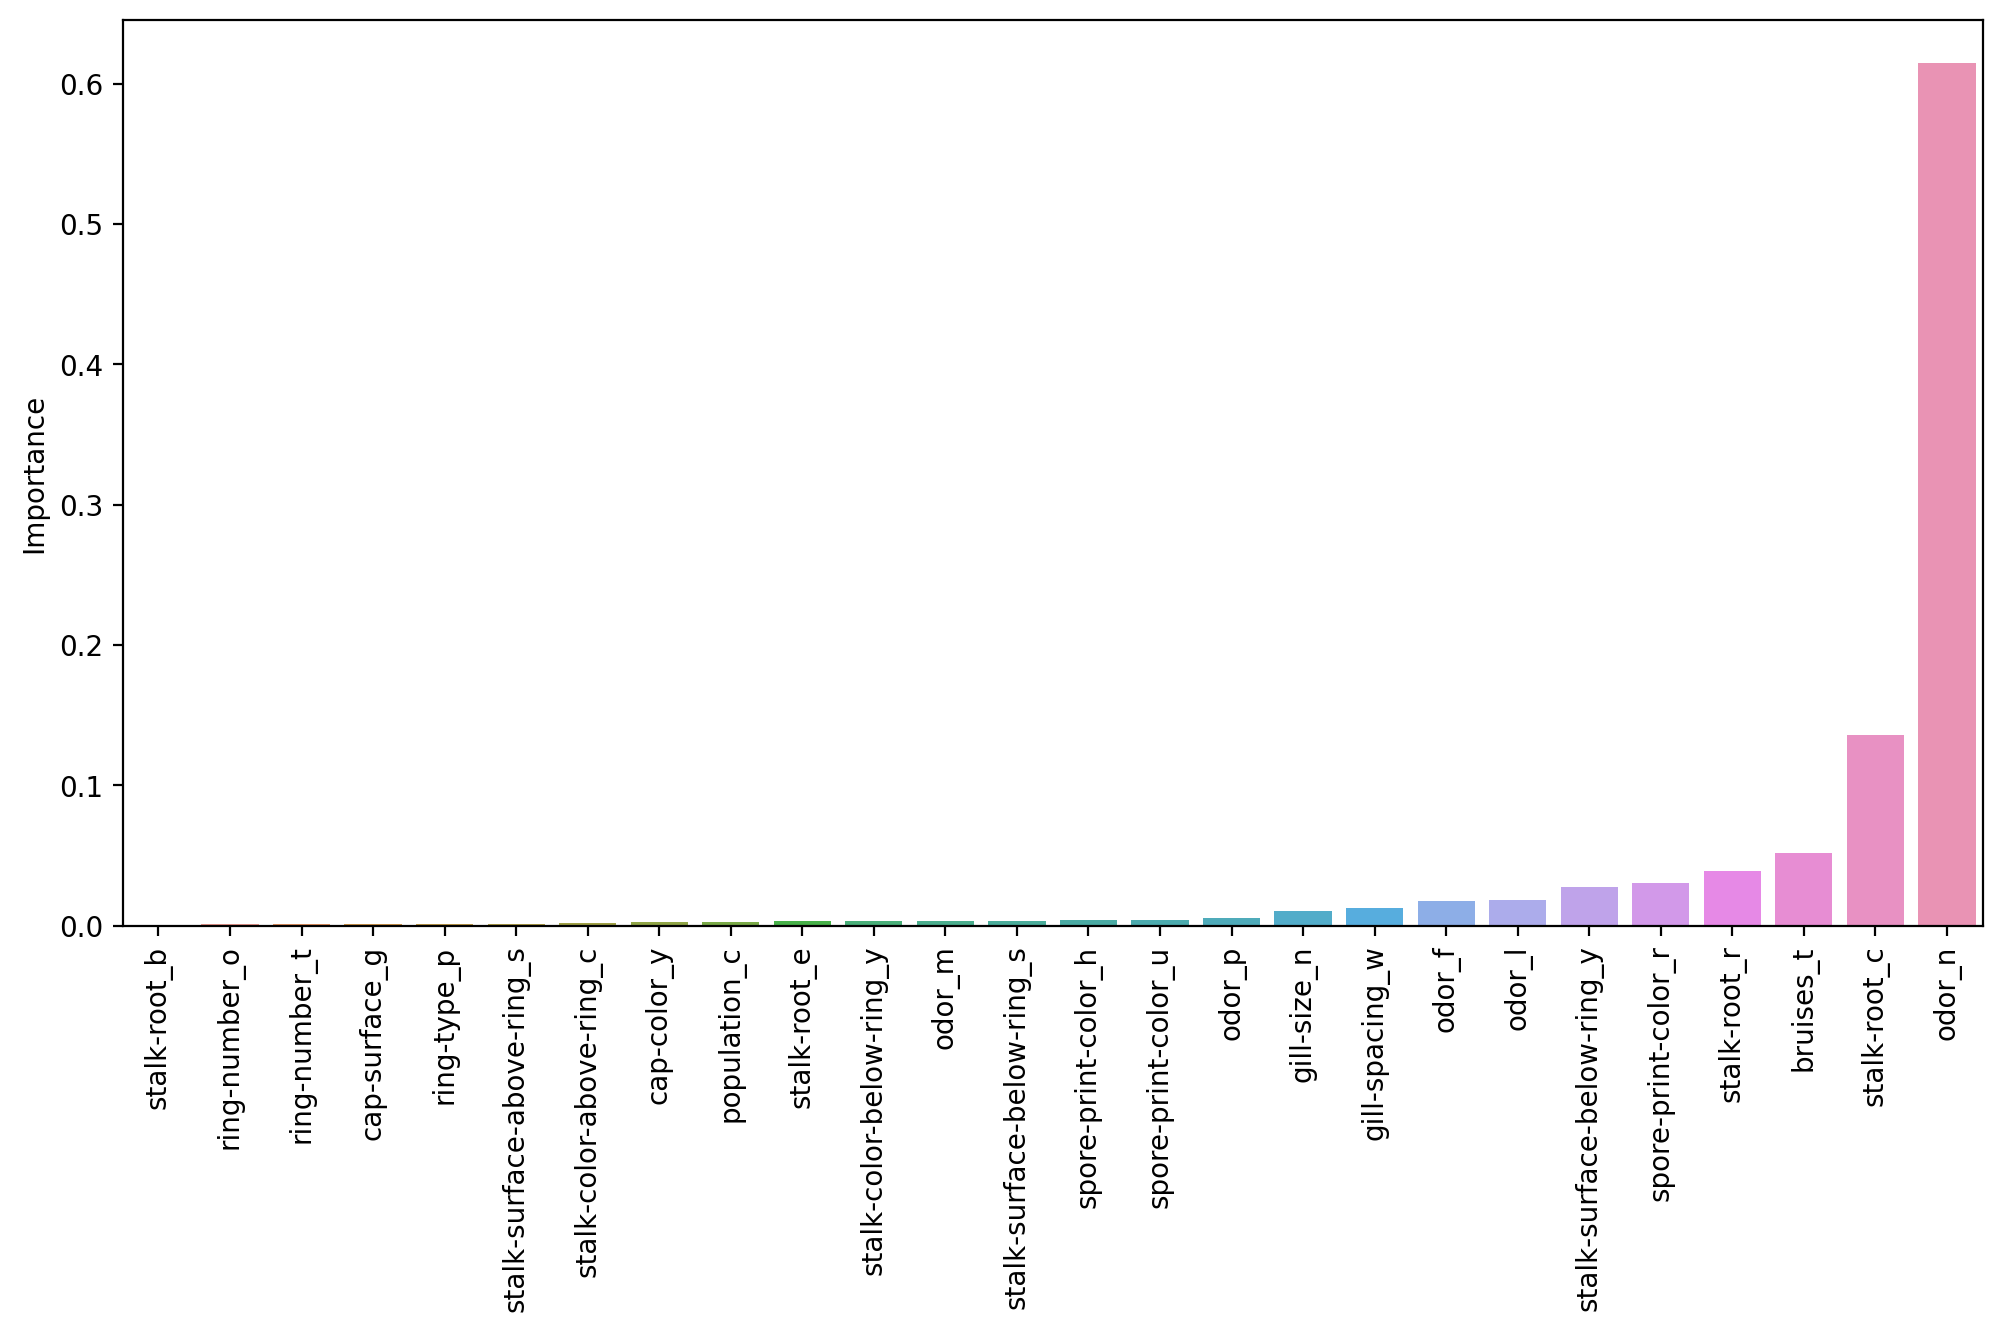

In [37]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=imp.index, y='Importance',data=imp)
plt.xticks(rotation=90);